## Music Exploratory Data Analysis

In [1]:
from music21 import stream, interval, corpus, converter, instrument, metadata
from music21 import note, chord, environment, duration, clef, pitch, key, roman
from music21.stream import Score, Part, Measure
from dwbzen.music import MusicUtils, Instruments
import notebook
from datetime import date, timedelta
import random, math, re
import pandas as pd
import pathlib, random, copy
import sys
from builtins import isinstance
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

### Intervals

In [3]:
meta = MusicUtils.get_metadata_bundle(composer='Bach', title='^bwv[1,4].*')
titles = [meta[i].metadata.title for i in range(len(meta))]
print(f'number of titles: {len(titles)}\n{titles} ')

number of titles: 112
['bwv10.7.mxl', 'bwv101.7.mxl', 'bwv102.7.mxl', 'bwv103.6.mxl', 'bwv104.6.mxl', 'bwv108.6.mxl', 'bwv11.6.mxl', 'bwv110.7.mxl', 'bwv112.5-sc.mxl', 'bwv113.8.mxl', 'bwv114.7.mxl', 'bwv115.6.mxl', 'bwv117.4.mxl', 'bwv121.6.mxl', 'bwv122.6.mxl', 'bwv123.6.mxl', 'bwv126.6.mxl', 'bwv127.5.mxl', 'bwv13.6.mxl', 'bwv133.6.mxl', 'bwv136.6.mxl', 'bwv14.5.mxl', 'bwv140.7.mxl', 'bwv144.3.mxl', 'bwv144.6.mxl', 'bwv145.5.mxl', 'bwv148.6.mxl', 'bwv151.5.mxl', 'bwv153.1.mxl', 'bwv153.5.mxl', 'bwv153.9.mxl', 'bwv154.3.mxl', 'bwv154.8.mxl', 'bwv155.5.mxl', 'bwv156.6.mxl', 'bwv159.5.mxl', 'bwv16.6.mxl', 'bwv161.6.mxl', 'bwv164.6.mxl', 'bwv166.6.mxl', 'bwv168.6.mxl', 'bwv169.7.mxl', 'bwv17.7.mxl', 'bwv172.6.mxl', 'bwv174.5.mxl', 'bwv176.6.mxl', 'bwv177.4.mxl', 'bwv177.5.mxl', 'bwv179.6.mxl', 'bwv18.5-lz.mxl', 'bwv18.5-w.mxl', 'bwv180.7.mxl', 'bwv183.5.mxl', 'bwv184.5.mxl', 'bwv187.7.mxl', 'bwv19.7.mxl', 'bwv194.12.mxl', 'bwv194.6.mxl', 'bwv197.10.mxl', 'bwv197.5.mxl', 'bwv4.8.mxl', 'b

In [4]:
df, pnames,pnums = MusicUtils.get_all_score_intervals(composer='Bach',title='^bwv[1,4].*') # ,partnames=['Tenor'])
print(df.head())
print(pnames)
print(pnums)

                          interval  part_number part_name  \
0   <music21.interval.Interval m3>            1   Soprano   
1  <music21.interval.Interval m-3>            1   Soprano   
2   <music21.interval.Interval P1>            1   Soprano   
3   <music21.interval.Interval P1>            1   Soprano   
4   <music21.interval.Interval P1>            1   Soprano   

                   note1                  note2 name directedName  \
0  <music21.note.Note D>  <music21.note.Note F>   m3           m3   
1  <music21.note.Note F>  <music21.note.Note D>   m3          m-3   
2  <music21.note.Note D>  <music21.note.Note D>   P1           P1   
3  <music21.note.Note D>  <music21.note.Note D>   P1           P1   
4  <music21.note.Note D>  <music21.note.Note D>   P1           P1   

         niceName  semitones        title  
0     Minor Third          3  bwv10.7.mxl  
1     Minor Third         -3  bwv10.7.mxl  
2  Perfect Unison          0  bwv10.7.mxl  
3  Perfect Unison          0  bwv10.7.mxl 

In [6]:
score1_df, score1_partnames, score1_partnums = MusicUtils.get_all_score_notes(title='bwv400.mxl', partnames=['Soprano','Alto','Tenor','Bass'])
score2_df, score2_partnames, score2_partnums = MusicUtils.get_all_score_notes(title='bwv401.mxl', partnames=['Soprano','Alto','Tenor','Bass'])

### [Notes](https://web.mit.edu/music21/doc/moduleReference/moduleNote.html)


In [10]:
meta = MusicUtils.get_metadata_bundle(composer='Bach', title='^bwv4.*')
titles = [meta[i].metadata.title for i in range(len(meta))]
print(f'number of titles: {len(titles)}\n{titles} ')


number of titles: 52
['bwv4.8.mxl', 'bwv40.3.mxl', 'bwv40.6.mxl', 'bwv40.8.mxl', 'bwv400.mxl', 'bwv401.mxl', 'bwv402.mxl', 'bwv403.mxl', 'bwv404.mxl', 'bwv405.mxl', 'bwv406.mxl', 'bwv407.mxl', 'bwv408.mxl', 'bwv409.mxl', 'bwv41.6.mxl', 'bwv410.mxl', 'bwv411.mxl', 'bwv412.mxl', 'bwv413.mxl', 'bwv414.mxl', 'bwv415.mxl', 'bwv416.mxl', 'bwv417.mxl', 'bwv418.mxl', 'bwv419.mxl', 'bwv42.7.mxl', 'bwv420.mxl', 'bwv421.mxl', 'bwv422.mxl', 'bwv423.mxl', 'bwv424.mxl', 'bwv425.mxl', 'bwv426.mxl', 'bwv427.mxl', 'bwv428.mxl', 'bwv429.mxl', 'bwv43.11.mxl', 'bwv430.mxl', 'bwv431.mxl', 'bwv432.mxl', 'bwv433.mxl', 'bwv434.mxl', 'bwv435.mxl', 'bwv436.mxl', 'bwv437.mxl', 'bwv438.mxl', 'bwv44.7.mxl', 'bwv45.7.mxl', 'bwv46.6.mxl', 'bwv47.5.mxl', 'bwv48.3.mxl', 'bwv48.7.mxl'] 


In [11]:
notes_df, pnames,pnums = MusicUtils.get_all_score_notes(composer='Bach',title='^bwv4.*') # ,partnames=['Tenor'])
print(notes_df.head())
print(pnames)
print(pnums)

                     note  part_number part_name name nameWithOctave pitch  \
0   <music21.note.Note A>            1   Soprano    A             A4    A4   
1  <music21.note.Note G#>            1   Soprano   G#            G#4   G#4   
2   <music21.note.Note A>            1   Soprano    A             A4    A4   
3   <music21.note.Note B>            1   Soprano    B             B4    B4   
4   <music21.note.Note C>            1   Soprano    C             C5    C5   

   pitchClass    ps                         duration     type  ordinal  \
0           9  69.0  <music21.duration.Duration 1.0>  quarter        6   
1           8  68.0  <music21.duration.Duration 1.0>  quarter        6   
2           9  69.0  <music21.duration.Duration 0.5>   eighth        7   
3          11  71.0  <music21.duration.Duration 0.5>   eighth        7   
4           0  72.0  <music21.duration.Duration 1.0>  quarter        6   

   quarterLength  quarterLengthNoTuplets       title  
0            1.0               

In [21]:
soprano_notes_df = notes_df[notes_df['part_name'] == 'Soprano']
soprano_notes_df.reset_index(drop=True, inplace=True)
alto_notes_df = notes_df[notes_df['part_name'] == 'Alto']
alto_notes_df.reset_index(drop=True, inplace=True)
sa_df = pd.concat([soprano_notes_df, alto_notes_df])[['part_name','ps']]

<AxesSubplot:>

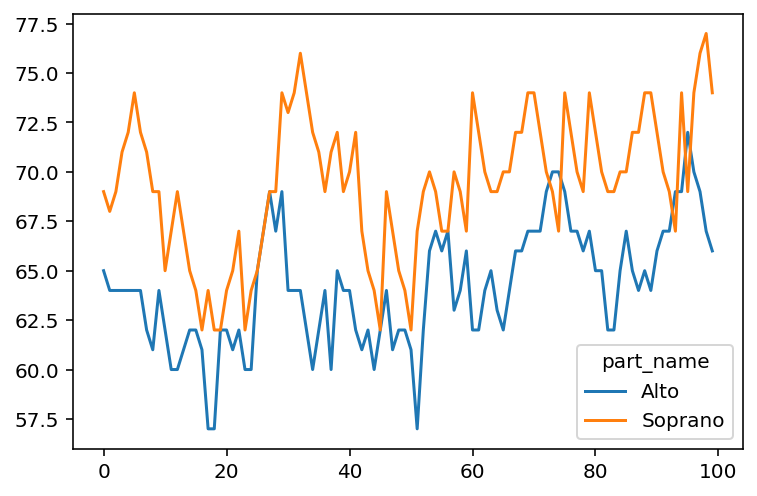

In [37]:
sa_df.pivot( columns='part_name',values='ps').iloc[0:100].plot.line()

In [7]:
anote = notes_df['note'].iloc[1]
dur = anote.duration
print(MusicUtils.note_info(anote))
print(MusicUtils.duration_info(dur))
print(anote.pitch.ps)

G#4, type: quarter, dots: 0, fullName: Quarter, quarterLength: 1.0, tuplets: ()
type: quarter, ordinal: 6, dots: 0, fullName: Quarter,         quarterLength 1.0, quarterLengthNoTuplets 1.0, tuplets: ()
68.0


<AxesSubplot:>

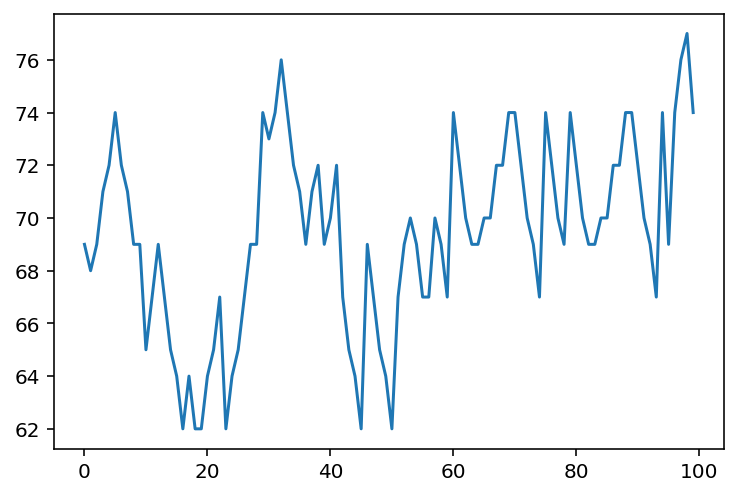

In [38]:
soprano_notes_df = notes_df[notes_df['part_name'] == 'Soprano']
soprano_notes_df.reset_index(drop=True, inplace=True)
soprano_notes_df['ps'].iloc[:100].plot.line()

In [39]:
#
# extract only the vocal parts
#
part_notes_df = notes_df[notes_df['part_name'].apply(lambda v: v in ['Soprano','Alto','Tenor','Bass'])]
part_notes_df.head()

,note,part_number,part_name,name,nameWithOctave,pitch,pitchClass,ps,duration,type,ordinal,quarterLength,quarterLengthNoTuplets,title
0,<music21.note.Note A>,1,Soprano,A,A4,A4,9,69.0,<music21.duration.Duration 1.0>,quarter,6,1.0,1.0,bwv4.8.mxl
1,<music21.note.Note G#>,1,Soprano,G#,G#4,G#4,8,68.0,<music21.duration.Duration 1.0>,quarter,6,1.0,1.0,bwv4.8.mxl
2,<music21.note.Note A>,1,Soprano,A,A4,A4,9,69.0,<music21.duration.Duration 0.5>,eighth,7,0.5,0.5,bwv4.8.mxl
3,<music21.note.Note B>,1,Soprano,B,B4,B4,11,71.0,<music21.duration.Duration 0.5>,eighth,7,0.5,0.5,bwv4.8.mxl
4,<music21.note.Note C>,1,Soprano,C,C5,C5,0,72.0,<music21.duration.Duration 1.0>,quarter,6,1.0,1.0,bwv4.8.mxl


In [40]:
part_notes_df[['name','nameWithOctave','pitch', 'pitchClass']].groupby(['pitchClass', 'name']).count()


nameWithOctave  pitch
pitchClass name                       
0          C               1255   1255
1          C#               472    472
           D-                46     46
2          D               1764   1764
3          D#               110    110
           E-               323    323
4          E               1428   1428
5          E#                32     32
           F               1015   1015
6          F#               720    720
           G-                 3      3
7          F##                2      2
           G               1458   1458
8          A-               115    115
           G#               332    332
9          A               1773   1773
10         A#                27     27
           B-               713    713
11         B               1007   1007

In [41]:
pitch_counts = part_notes_df[['name', 'pitchClass']].groupby('pitchClass').count()
pitch_counts = pitch_counts.reset_index()
pitch_counts

,pitchClass,name
0,0,1255
1,1,518
2,2,1764
3,3,433
4,4,1428
5,5,1047
6,6,723
7,7,1460
8,8,447
9,9,1773


In [42]:
pitches_list = ['C', 'C#', 'D', 'Eb', 'E', 'F', 'F#', 'G', 'G#', 'A', 'Bb', 'B']
pitch_counts['pitch_name'] = [ pitches_list[p] for p in pitch_counts['pitchClass']]
pitch_counts

,pitchClass,name,pitch_name
0,0,1255,C
1,1,518,C#
2,2,1764,D
3,3,433,Eb
4,4,1428,E
5,5,1047,F
6,6,723,F#
7,7,1460,G
8,8,447,G#
9,9,1773,A


## Work with existing counts and Markov chain data

In [2]:
#
# result of NoteCollector order 1, type dpc (diatonic pitch class)
#
bwv371_df = pd.read_csv('resources/music/bwv371_notesCounts_dpc_01.csv')
bwv4xx_df = pd.read_csv('resources/music/bwv4xx_notesCounts_dpc_01.csv')
bwv4xx_df_major = pd.read_csv('resources/music/bwv4xx_major_notesCounts_dpc_01.csv')
bwv4xx_df_minor = pd.read_csv('resources/music/bwv4xx_minor_notesCounts_dpc_01.csv')
op18_1_1_df = pd.read_csv('resources/music/op18.1_1_notesCounts_dpc_01.csv')

In [3]:
bwv4xx_df.head()

,KEY,E,D,C#,C,A,F,G,B-,B,G#,F#,E-
0,C,84.0,437.0,21.0,401.0,74.0,89.0,112.0,109.0,492.0,12.0,8.0,3.0
1,E,347.0,575.0,15.0,99.0,191.0,404.0,67.0,1.0,29.0,6.0,93.0,23.0
2,D,493.0,275.0,117.0,542.0,82.0,30.0,151.0,24.0,53.0,8.0,1.0,43.0
3,C#,13.0,145.0,15.0,11.0,27.0,2.0,0.0,1.0,20.0,1.0,1.0,10.0
4,A,106.0,153.0,8.0,45.0,359.0,50.0,489.0,96.0,366.0,132.0,16.0,3.0


**Rearrange the data with the columns 'pitch' (the KEY column), 'next_pitch' (the column labels) and count**

In [4]:
pitchCounts_df, pitches_counts_df = MusicUtils.rearrange(bwv371_df)

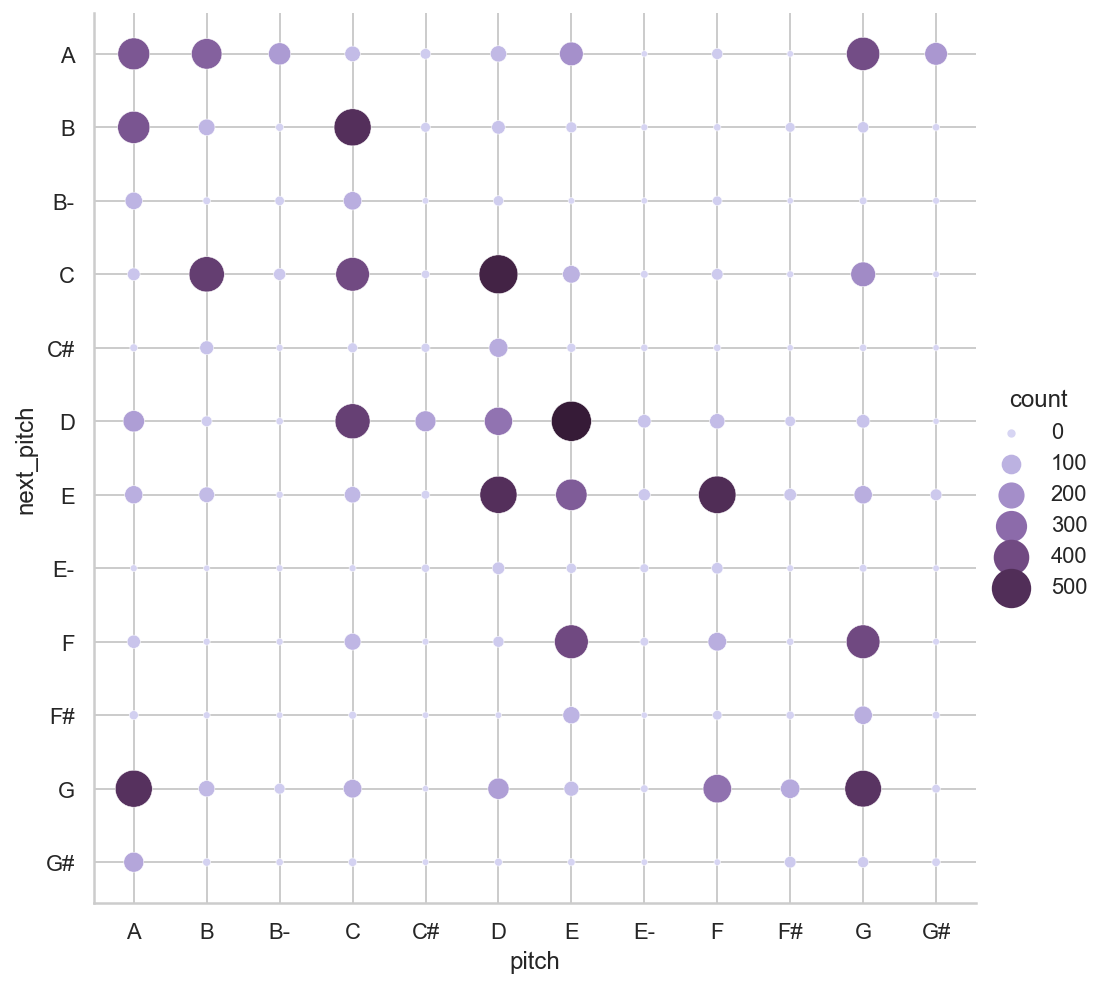

In [4]:
# Bach all bwv4+ scores
MusicUtils.plot_pitch_counts(bwv4xx_df, start=0.5)

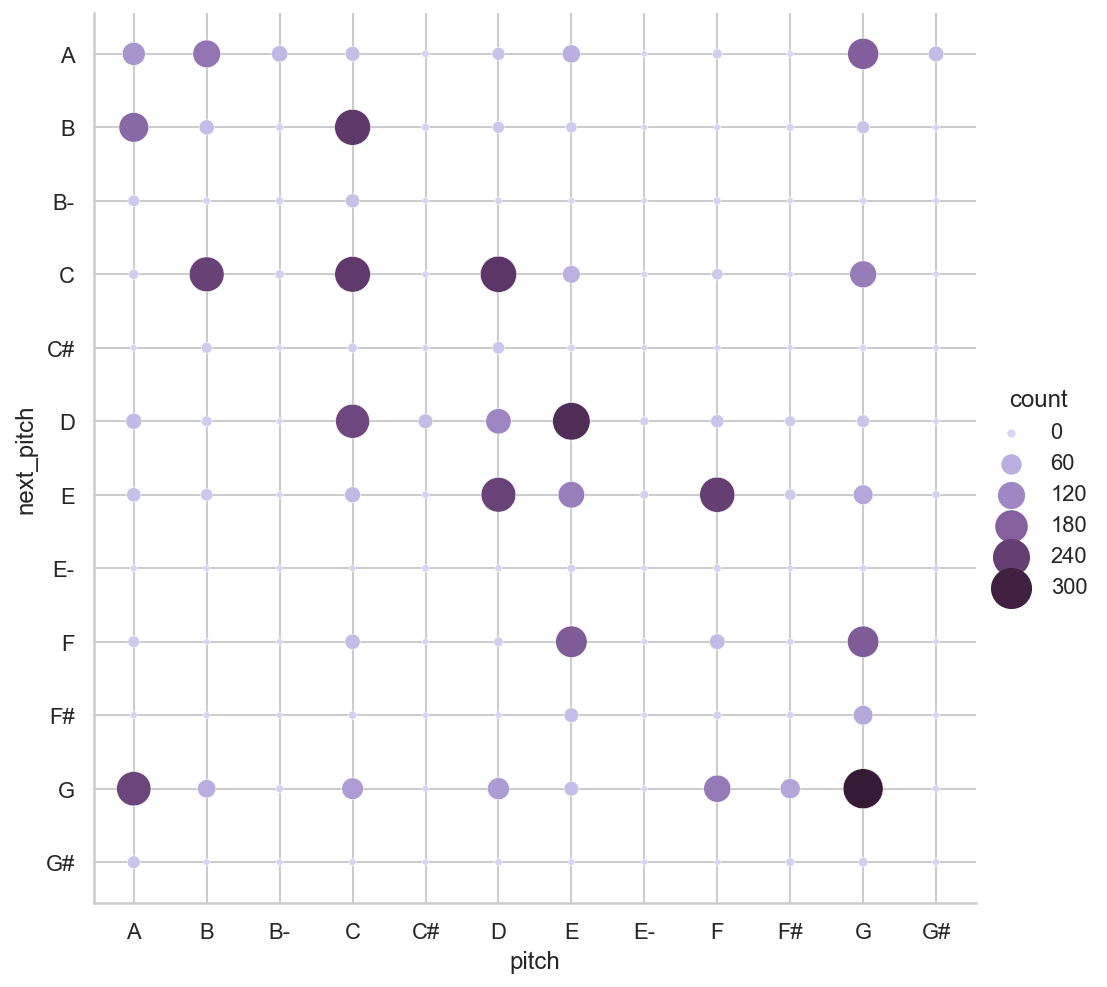

In [7]:
# Bach major only bwv4+ 24 scores
MusicUtils.plot_pitch_counts(bwv4xx_df_major, start=0.5)

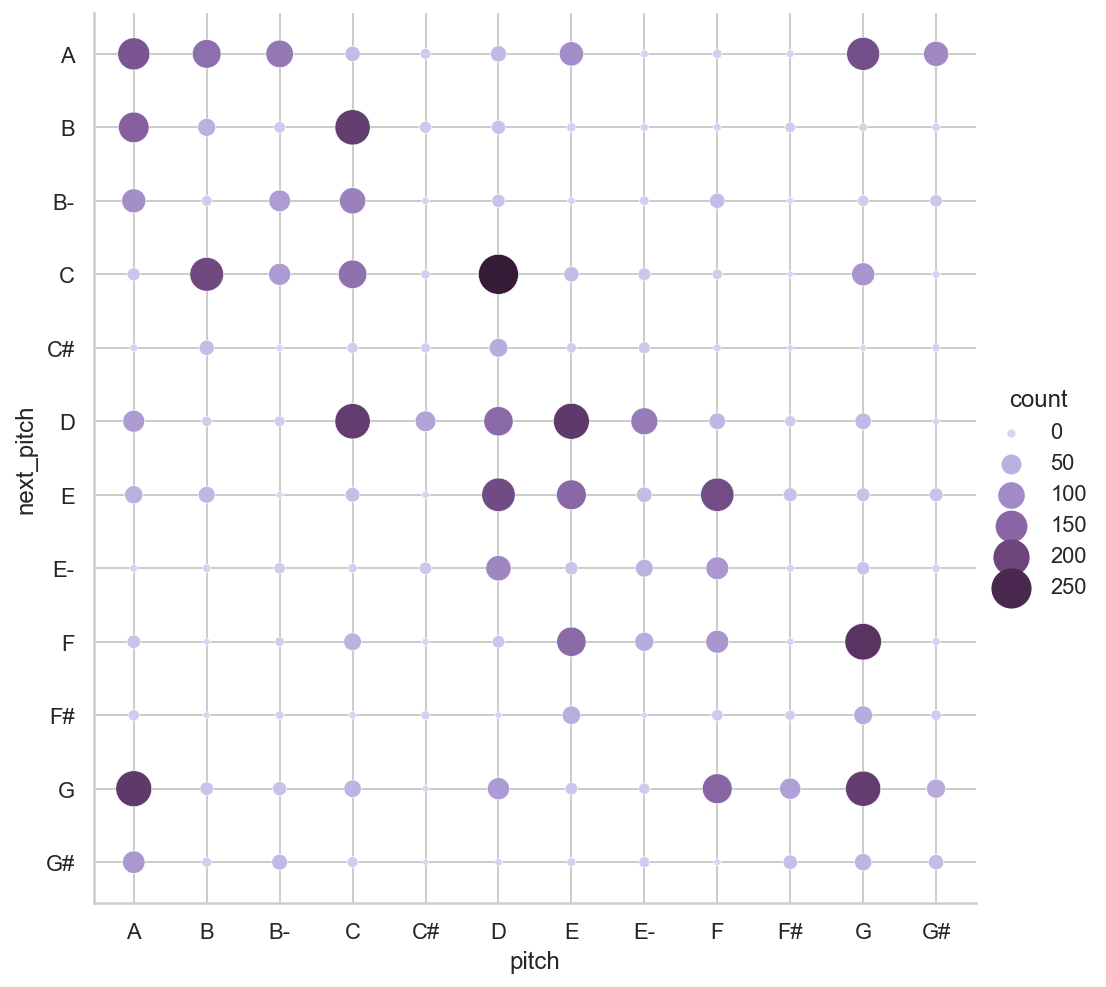

In [8]:
# Bach minor only bwv4+ 27 scores
MusicUtils.plot_pitch_counts(bwv4xx_df_minor, start=0.5)

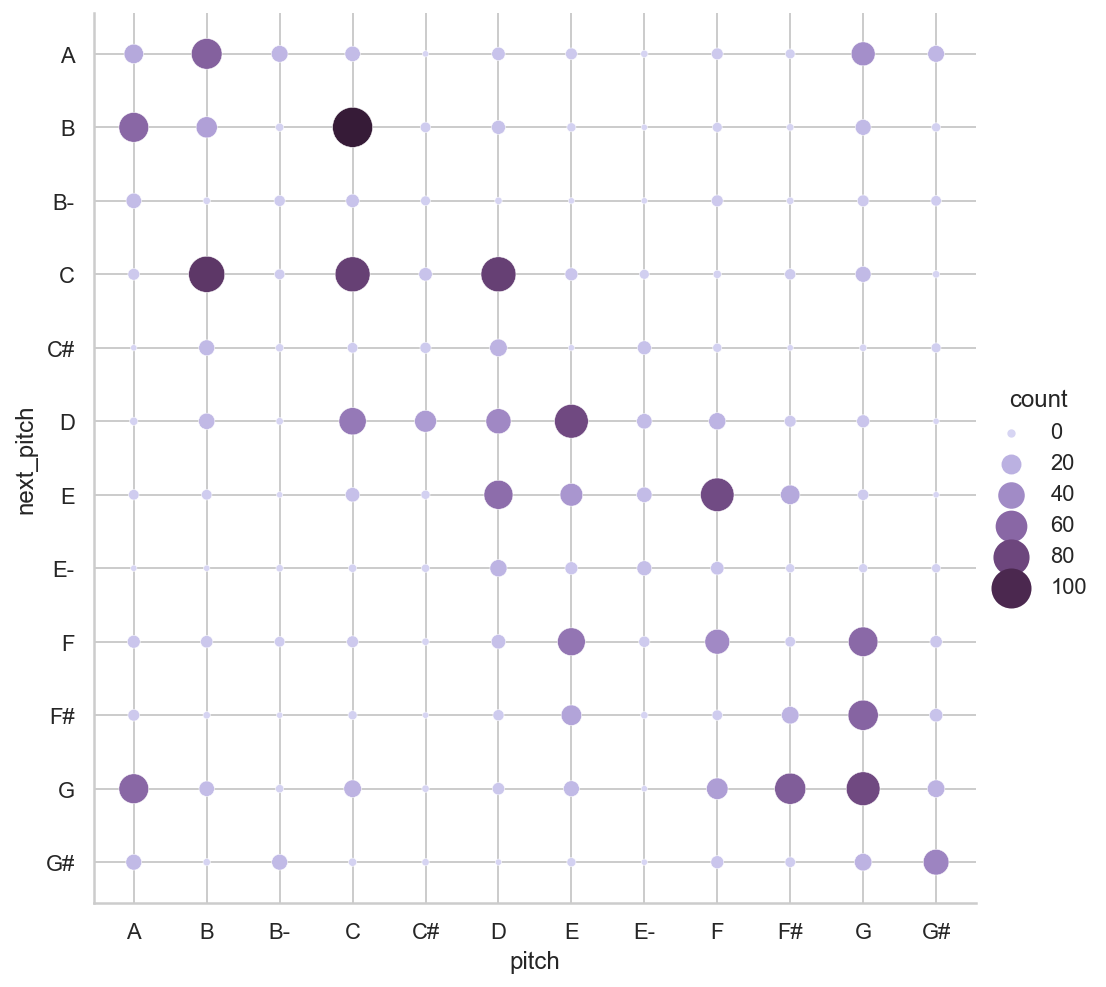

In [9]:
# Beethoven
MusicUtils.plot_pitch_counts(op18_1_1_df, start=0.5)

## Music21 Graphing and Corpus Search

In [12]:
#s = corpus.parse("BWV437")
predicate = lambda x: x.startswith('bwv4')
md = corpus.search(predicate, 'title')   # returns MetadataBundle
s = md[0].parse()
for i in range(1,len(md)-1):
    sx = md[i].parse()
    s.append(sx)

<music21.graph.plot.Histogram for <music21.stream.Score 0x1d3ab4554f0>>

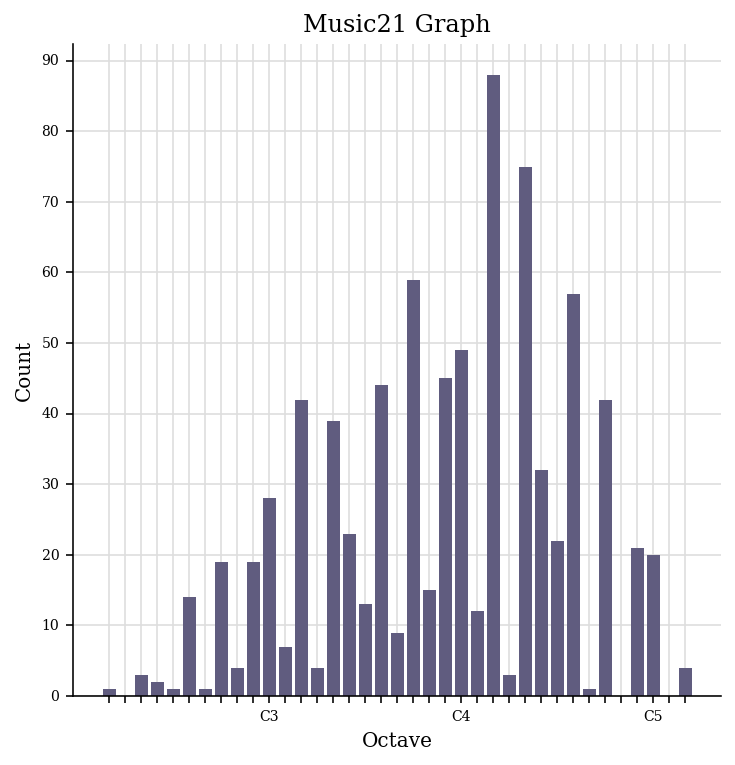

In [28]:
s = corpus.parse("BWV371")
s.plot('histogram', 'octave', xHideUnused=False, yAxisLabel='Number of Pitches')

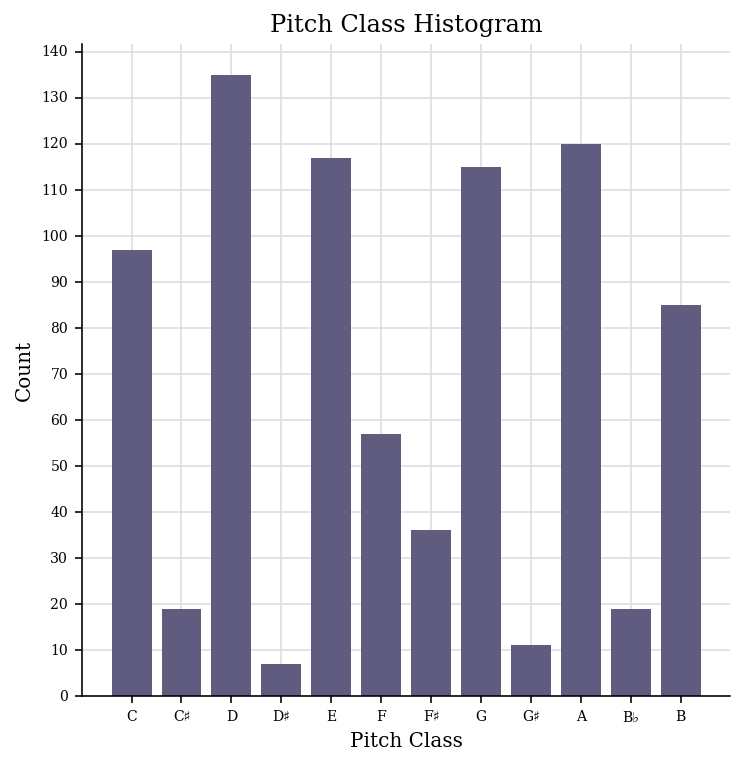

In [29]:
x = s.plot('histogram', 'pitchClass', xHideUnused=False, yAxisLabel='Number of Pitches')

<music21.graph.plot.WindowedKey for <music21.stream.Score 0x1ee653eeee0>>

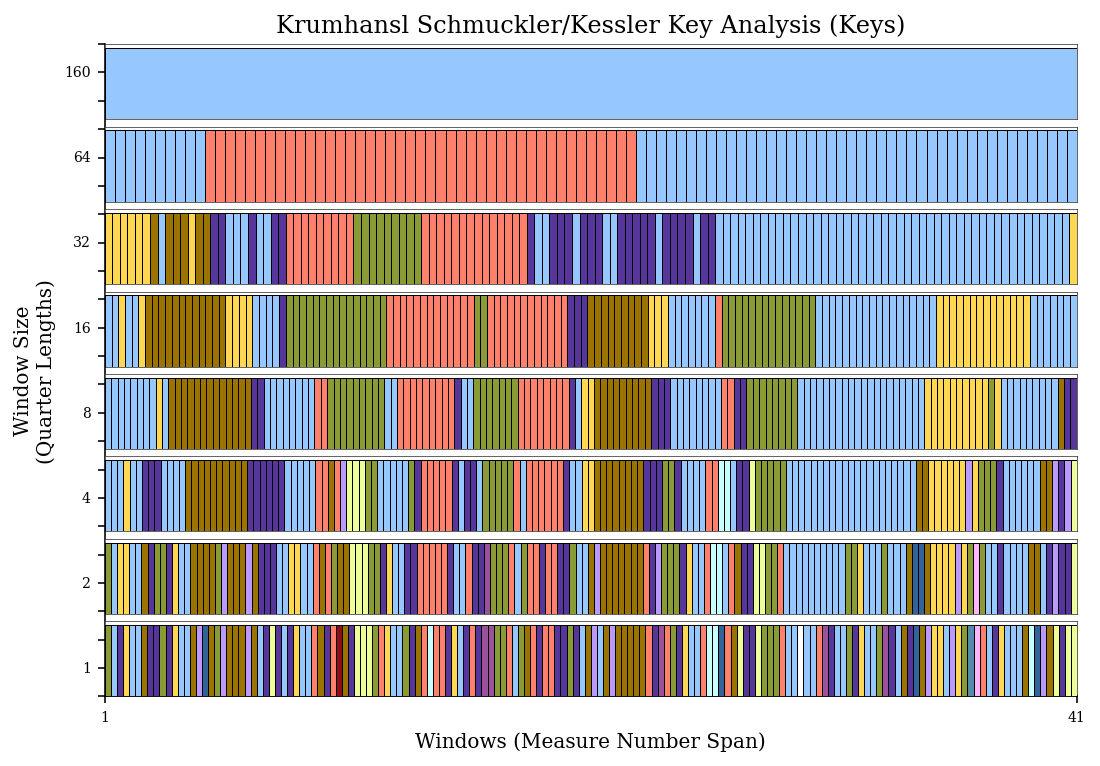

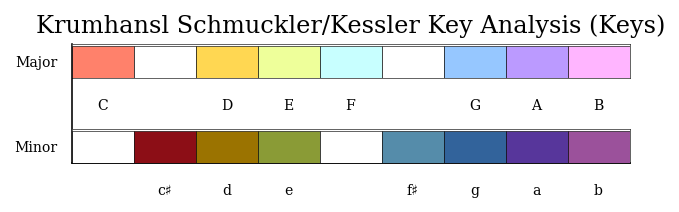

In [5]:
s.plot('colorgrid')

<music21.graph.plot.HistogramPitchClass for <music21.stream.Score 0x1d39f282bb0>>

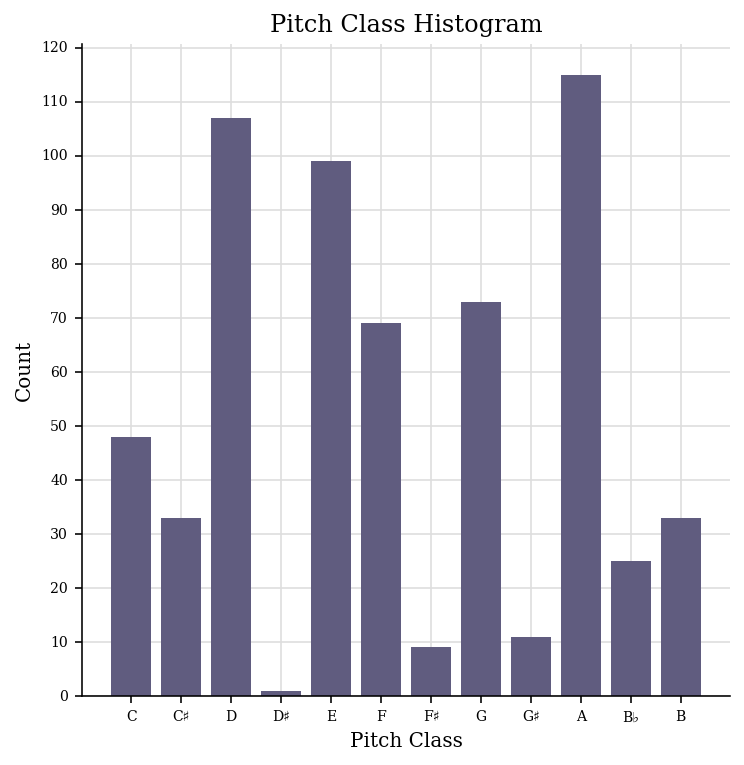

In [30]:
s1=corpus.parse("bwv371")
s2=corpus.parse("bwv437") # these both have C-major key signature
s1.append(s2)
s2.plot('histogram','pitchClass')


### Heat maps

Using existing noteCounts_dpc files

In [8]:
    
bwv371_df = pd.read_csv('resources/music/bwv371_notesCounts_dpc_01.csv')
bwv4xx_df = pd.read_csv('resources/music/bwv4xx_notesCounts_dpc_01.csv')
op18_1_1_df = pd.read_csv('resources/music/op18.1_1_notesCounts_dpc_01.csv')


In [8]:
bwv4xx_df

,KEY,E,D,C#,C,A,F,G,B-,B,G#,F#,E-
0,C,84.0,437.0,21.0,401.0,74.0,89.0,112.0,109.0,492.0,12.0,8.0,3.0
1,E,347.0,575.0,15.0,99.0,191.0,404.0,67.0,1.0,29.0,6.0,93.0,23.0
2,D,493.0,275.0,117.0,542.0,82.0,30.0,151.0,24.0,53.0,8.0,1.0,43.0
3,C#,13.0,145.0,15.0,11.0,27.0,2.0,0.0,1.0,20.0,1.0,1.0,10.0
4,A,106.0,153.0,8.0,45.0,359.0,50.0,489.0,96.0,366.0,132.0,16.0,3.0
5,F,501.0,71.0,5.0,35.0,31.0,112.0,283.0,19.0,5.0,1.0,19.0,34.0
6,G,108.0,53.0,5.0,210.0,391.0,403.0,478.0,7.0,32.0,30.0,109.0,7.0
7,B-,4.0,5.0,3.0,40.0,166.0,3.0,28.0,18.0,9.0,5.0,1.0,2.0
8,B,75.0,27.0,56.0,443.0,328.0,3.0,83.0,7.0,86.0,9.0,3.0,0.0
9,G#,36.0,0.0,0.0,2.0,173.0,2.0,12.0,2.0,5.0,12.0,7.0,1.0


In [9]:
nc_df, nc_raw_df = MusicUtils.pivot_data(bwv4xx_df)
print(nc_df)
sums = nc_df.apply(np.sum,axis=1)   # sum across the columns of each row
print(nc_raw_df)
print(nc_raw_df.index)
print(nc_df.index)

note2    A    B   B-    C   C#    D    E  E-    F   F#    G   G#
note1                                                           
A      359  366   96   45    8  153  106   3   50   16  489  132
B      328   86    7  443   56   27   75   0    3    3   83    9
B-     166    9   18   40    3    5    4   2    3    1   28    5
C       74  492  109  401   21  437   84   3   89    8  112   12
C#      27   20    1   11   15  145   13  10    2    1    0    1
D       82   53   24  542  117  275  493  43   30    1  151    8
E      191   29    1   99   15  575  347  23  404   93   67    6
E-       0    3    0    7    5   52   40  14   13    0    7    1
F       31    5   19   35    5   71  501  34  112   19  283    1
F#       1   20    0    3    0   26   43   2    5   10  123   35
G      391   32    7  210    5   53  108   7  403  109  478   30
G#     173    5    2    2    0    0   36   1    2    7   12   12
    note1 note2  count
0       C     A     74
1       C     B    492
2       C    B-    10

In [10]:
nc_df.head()

note2,A,B,B-,C,C#,D,E,E-,F,F#,G,G#
note1,,,,,,,,,,,,
A,359,366,96,45,8,153,106,3,50,16,489,132
B,328,86,7,443,56,27,75,0,3,3,83,9
B-,166,9,18,40,3,5,4,2,3,1,28,5
C,74,492,109,401,21,437,84,3,89,8,112,12
C#,27,20,1,11,15,145,13,10,2,1,0,1


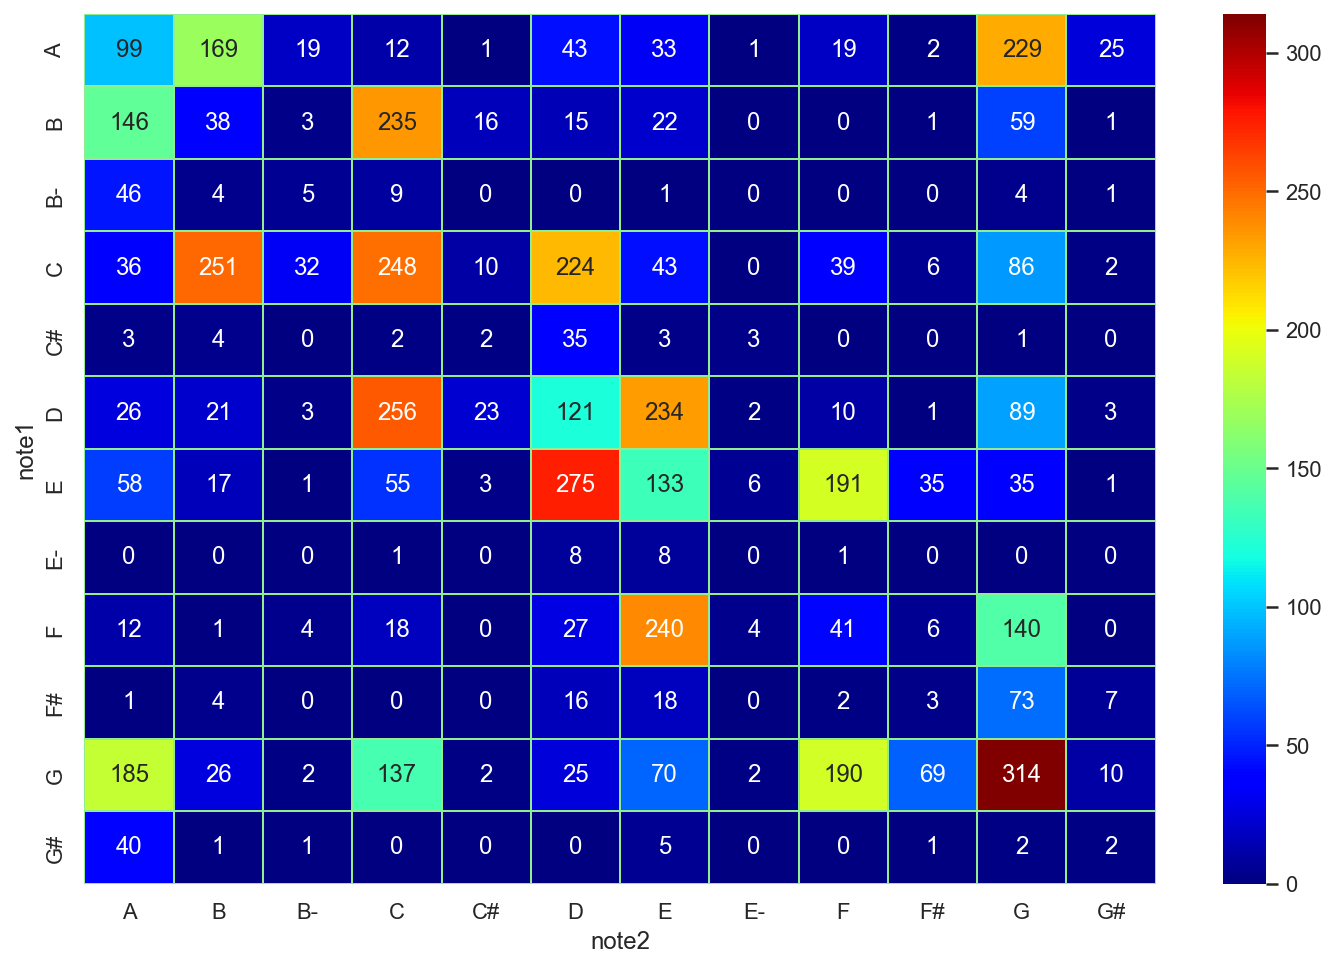

In [15]:
# bwv4xx_df
MusicUtils.plot_heat_map(bwv4xx_df_major, fmt='d', annot=True, cmap='jet')

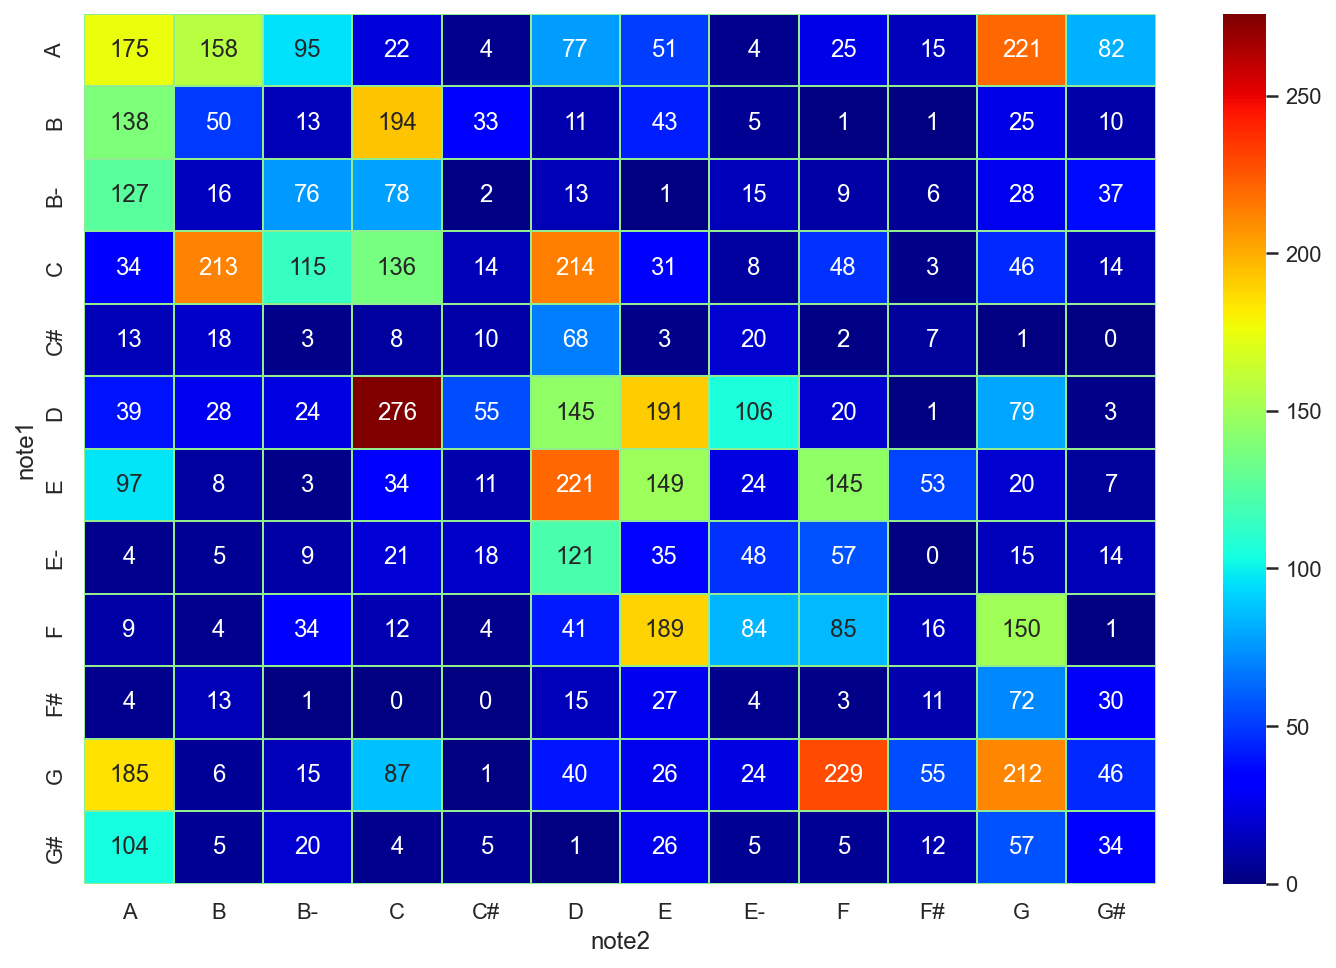

In [16]:
# bwv4xx_df
MusicUtils.plot_heat_map(bwv4xx_df_minor, fmt='d', annot=True, cmap='jet')

In [12]:
nc_pct_df = nc_df.divide(sums, axis=0)*100
nc_pct_df

note2,A,B,B-,C,C#,D,E,E-,F,F#,G,G#
note1,,,,,,,,,,,,
A,19.692814,20.076796,5.266045,2.468459,0.438837,8.392759,5.814591,0.164564,2.742732,0.877674,26.823917,7.240812
B,29.285714,7.678571,0.625000,39.553571,5.000000,2.410714,6.696429,0.000000,0.267857,0.267857,7.410714,0.803571
B-,58.450704,3.169014,6.338028,14.084507,1.056338,1.760563,1.408451,0.704225,1.056338,0.352113,9.859155,1.760563
C,4.017372,26.710098,5.917481,21.769815,1.140065,23.724213,4.560261,0.162866,4.831705,0.434311,6.080347,0.651466
C#,10.975610,8.130081,0.406504,4.471545,6.097561,58.943089,5.284553,4.065041,0.813008,0.406504,0.000000,0.406504
D,4.507971,2.913689,1.319406,29.796592,6.432106,15.118197,27.102804,2.363936,1.649258,0.054975,8.301264,0.439802
E,10.324324,1.567568,0.054054,5.351351,0.810811,31.081081,18.756757,1.243243,21.837838,5.027027,3.621622,0.324324
E-,0.000000,2.112676,0.000000,4.929577,3.521127,36.619718,28.169014,9.859155,9.154930,0.000000,4.929577,0.704225
F,2.777778,0.448029,1.702509,3.136201,0.448029,6.362007,44.892473,3.046595,10.035842,1.702509,25.358423,0.089606


<AxesSubplot:xlabel='note2', ylabel='note1'>

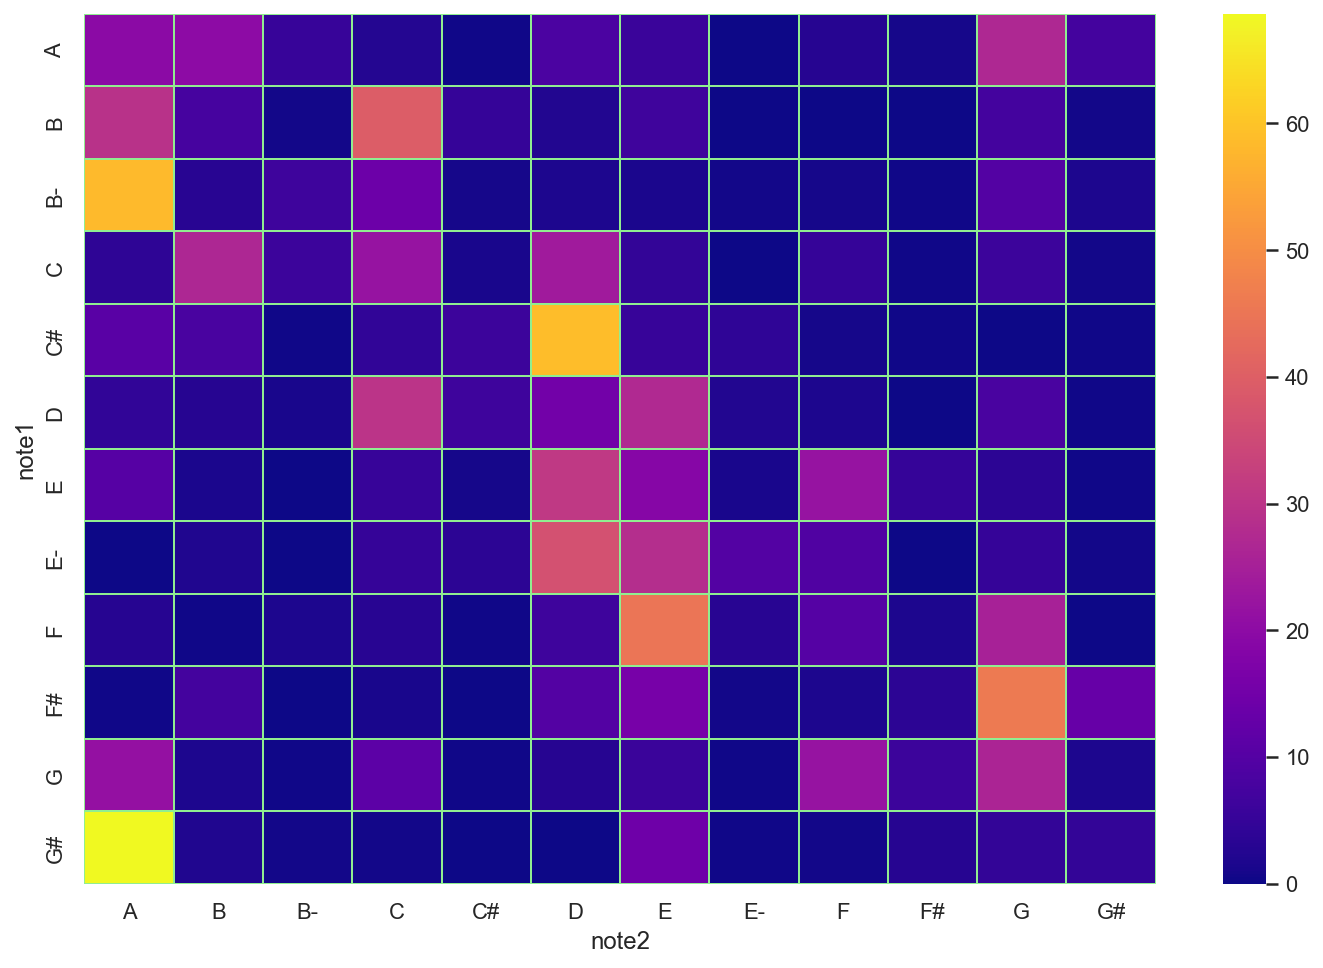

In [13]:
# bwv4xx_df as a percentage of the total in each row
plt.figure(figsize=(12,8))
sns.heatmap(nc_pct_df, annot=False, linewidths=.5, linecolor='LightGreen', cmap="plasma")

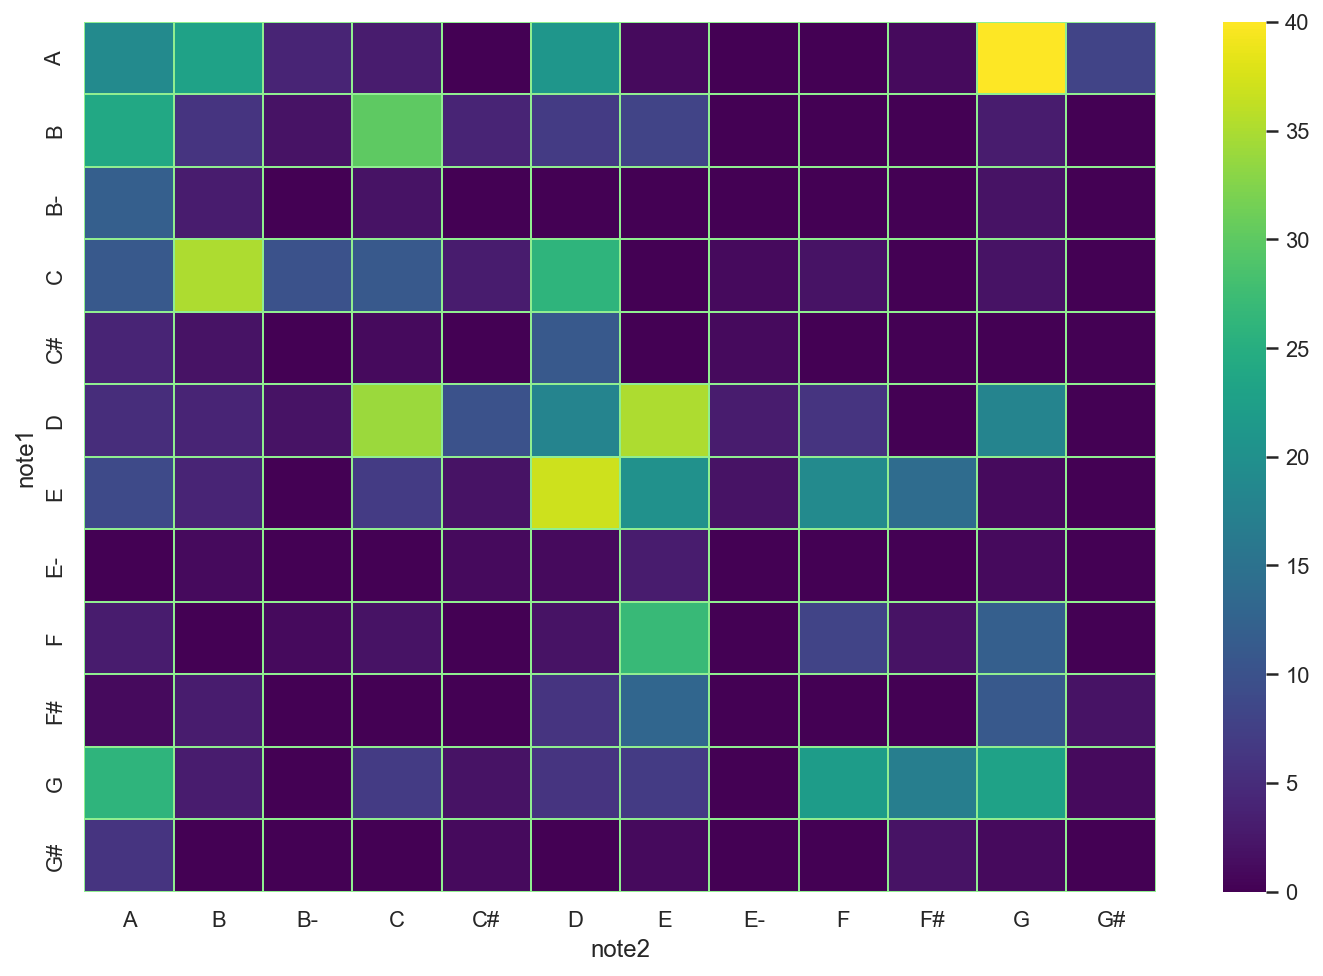

In [14]:
# Bach - BWV371
bwv371_df = pd.read_csv('resources/music/bwv371_notesCounts_dpc_01.csv')
MusicUtils.plot_heat_map(bwv371_df, annot=False, fmt="d", linewidths=.5, linecolor='LightGreen')

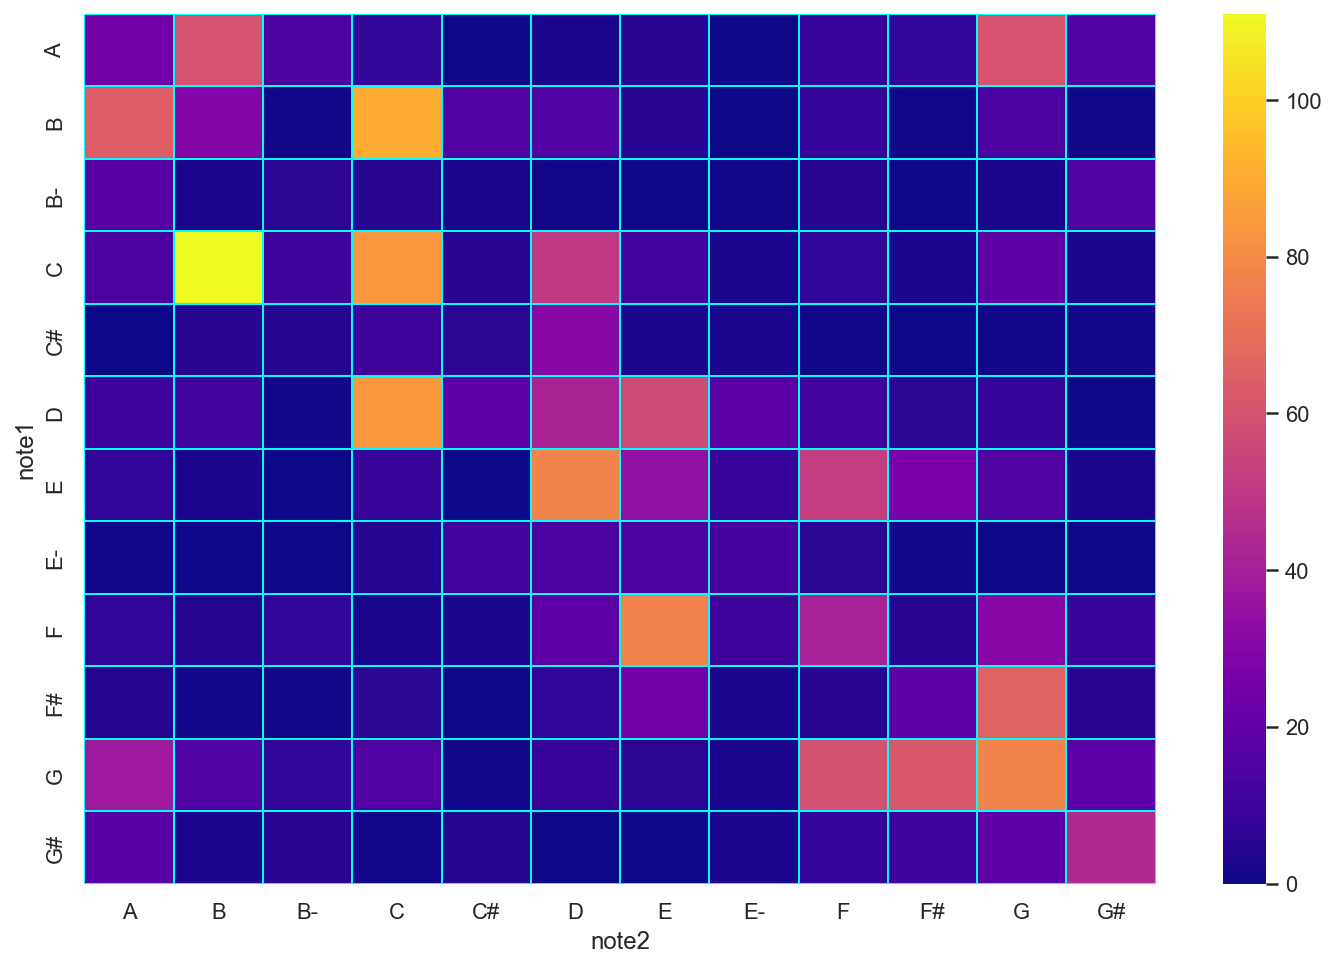

In [15]:
# Beethoven Op. 18.1 1st movement
op18_1_1_df = pd.read_csv('resources/music/op18.1_1_notesCounts_dpc_01.csv')
MusicUtils.plot_heat_map(op18_1_1_df, annot=False, fmt="d", linewidths=.5, linecolor='cyan', cmap="plasma")

In [14]:
notes_op18_df, notes_op18_raw_df = MusicUtils.pivot_data(op18_1_1_df)
notes_op18_df

note2,A,B,B-,C,C#,D,E,E-,F,F#,G,G#
note1,,,,,,,,,,,,
A,24,60,14,7,0,2,5,0,9,7,60,15
B,64,29,1,90,15,16,5,0,8,1,14,1
B-,17,2,6,5,2,1,0,1,5,0,2,15
C,14,111,10,84,5,50,12,2,7,3,19,2
C#,0,5,4,10,6,31,3,2,1,0,1,1
D,10,11,1,84,19,42,57,18,12,6,8,0
E,7,3,0,9,0,78,34,9,52,27,15,3
E-,1,0,0,4,11,14,14,13,6,1,0,0
F,7,4,7,2,3,18,77,10,41,5,30,9


### Interval heat maps

In [18]:
bwv37x_intervals_df = pd.read_csv('resources/music/bwv37x_intervalsCounts_01.csv')

In [19]:
bwv37x_intervals_df.head()

,KEY,-5,2,-7,-2,5,-1,1,-12,7,...,-4,-9,-6,-10,-14,8,10,9,-11,100
0,99,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-5,0.0,6.0,1.0,4.0,8.0,0.0,8.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,122.0,29.0,92.0,15.0,4.0,123.0,3.0,0.0,...,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-7,0.0,17.0,0.0,2.0,10.0,4.0,1.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,-2,0.0,115.0,3.0,129.0,20.0,157.0,4.0,0.0,5.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,1.0


In [26]:
ic_df, ic_raw_df = MusicUtils.pivot_data(bwv37x_intervals_df,  from_column_name='interval1', to_column_name='interval2')
ic_df.head()

interval2,-1,-10,-11,-12,-14,-2,-3,-4,-5,-5.1,...,10,100,12,2,3,4,5,7,8,9
interval1,,,,,,,,,,,,,,,,,,,,,
-14.0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
-12.0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,5,4,0,0
-11.0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
-10.0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
-9.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [25]:
# showing percentages not a good choice for intervals
#
sums = ic_df.apply(np.sum,axis=1)   # sum across the columns of each row
ic_pct_df = ic_df.divide(sums, axis=0)*100
## plt.figure(figsize=(14,8))
## sns.heatmap(ic_pct_df, annot=False, fmt="f", linewidths=.5, linecolor='LightGreen', cmap="plasma")

<AxesSubplot:xlabel='interval1', ylabel='interval2'>

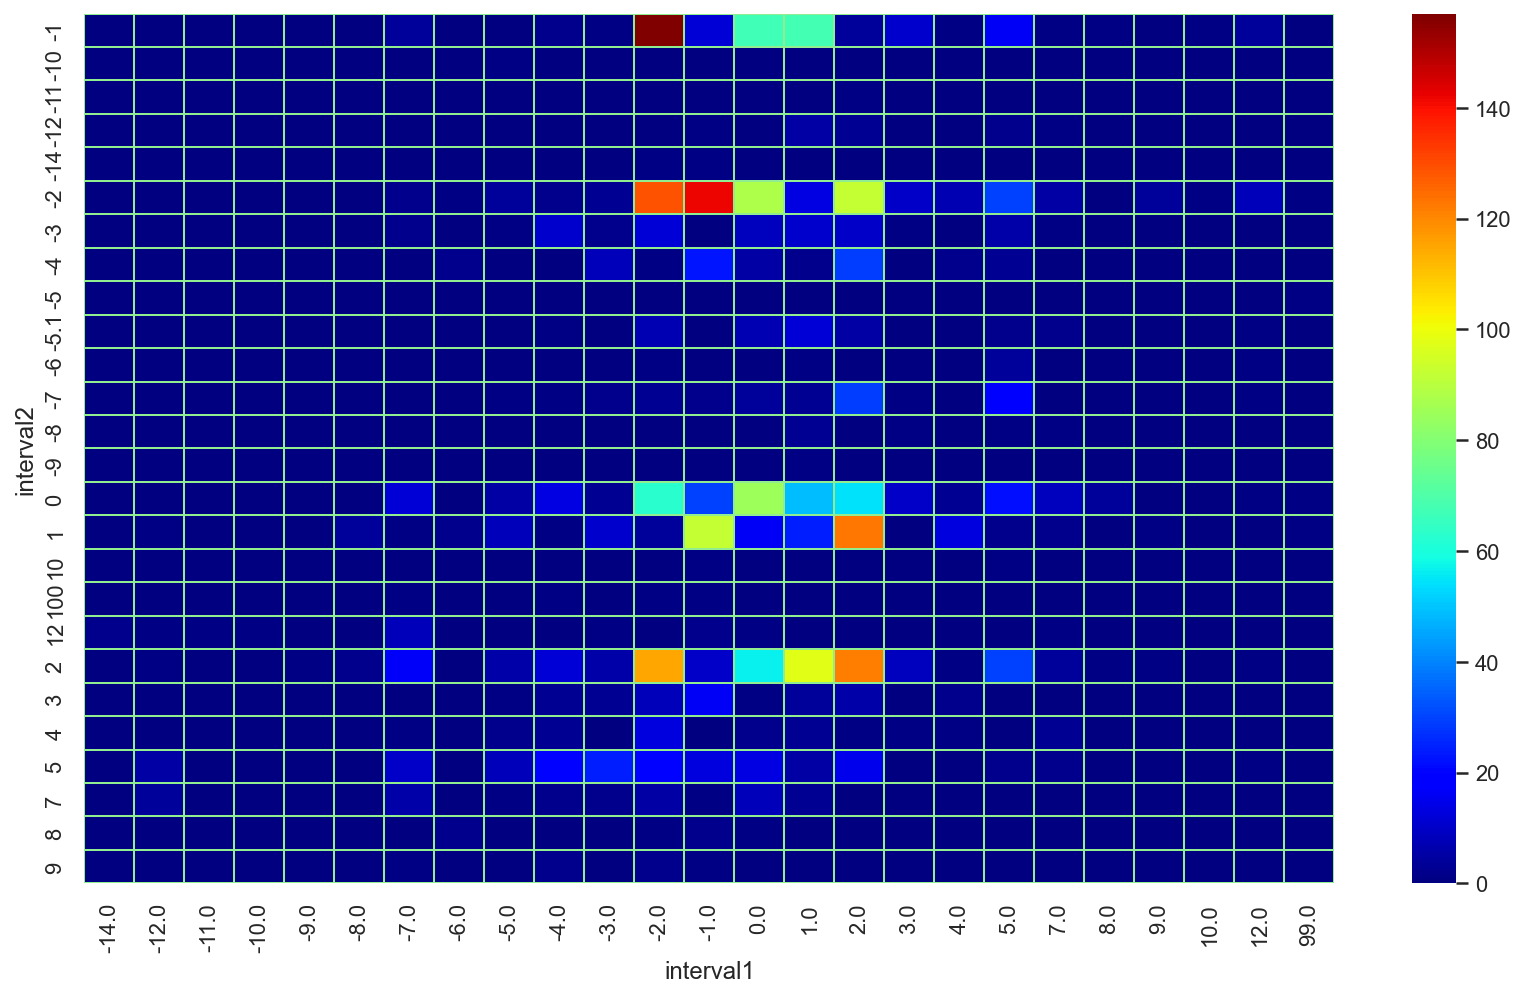

In [30]:
# heatmap of raw counts
#
plt.figure(figsize=(14,8))
sns.heatmap(ic_df.transpose(), annot=False, fmt="f", linewidths=.5, linecolor='LightGreen', cmap="jet")

### Scale degrees

In [16]:
def get_scale_degrees(apart:Part) -> [dict]:
    return MusicUtils.get_scale_degrees(apart)

In [17]:
composer='bach'
title='^bwv372'
scores, titles = MusicUtils.get_scores_from_corpus(composer=composer, title=title)
print(f'number of titles: {len(titles)}\n{titles} ')

number of titles: 1
['bwv372.mxl'] 


In [18]:
def get_part(scores, partname):
    for ascore in scores:
        print(ascore.metadata.title)
        parts = ascore.getElementsByClass(Part)
        for apart in parts:
            if apart.partName == partname:
                ks, mnumbers = MusicUtils.get_keySignatures(apart)
                print(f'  {apart.partName}  {ks}')
                return apart

apart = get_part(scores, 'Soprano')  # in d, other parts in F
#MusicUtils.get_scale_degrees(apart)

bwv372.mxl
  Soprano  [<music21.key.Key of d minor>]


In [19]:
MusicUtils.get_keySignatures(apart)

([<music21.key.Key of d minor>], [1])

In [20]:
scores, titles = MusicUtils.get_scores_from_corpus(composer='bach', title='^bwv372', keypart='Soprano', filters=)
ascore = scores[0]

In [21]:
MusicUtils.get_score_keySignatures(ascore)

{'Soprano': ([<music21.key.Key of d minor>], [1]),
 'Alto': ([<music21.key.Key of F major>], [1]),
 'Tenor': ([<music21.key.Key of F major>], [1]),
 'Bass': ([<music21.key.Key of F major>], [1])}

In [9]:
scale_degrees = []
score_parts = MusicUtils.get_score_parts(ascore)
pdict = MusicUtils.get_score_notes(ascore)
for k in pdict.keys():
    sdlist = MusicUtils.get_scale_degrees(score_parts[k])  # scale degrees for notes in this Part
    scale_degrees.extend([x['number'] for x in  sdlist])
    
len(scale_degrees)

269

In [14]:
notes_df, pnames, pnums = MusicUtils.get_notes_for_score(ascore)

In [15]:
notes_df.head()

,note,part_number,part_name,name,nameWithOctave,pitch,pitchClass,ps,duration,type,ordinal,quarterLength,quarterLengthNoTuplets,scaleDegree
0,<music21.note.Note G>,1,Soprano,G,G4,G4,7,67.0,<music21.duration.Duration 1.0>,quarter,6,1.0,1.0,4
1,<music21.note.Note G>,1,Soprano,G,G4,G4,7,67.0,<music21.duration.Duration 1.0>,quarter,6,1.0,1.0,4
2,<music21.note.Note F#>,1,Soprano,F#,F#4,F#4,6,66.0,<music21.duration.Duration 1.0>,quarter,6,1.0,1.0,#3
3,<music21.note.Note G>,1,Soprano,G,G4,G4,7,67.0,<music21.duration.Duration 1.0>,quarter,6,1.0,1.0,4
4,<music21.note.Note A>,1,Soprano,A,A4,A4,9,69.0,<music21.duration.Duration 1.0>,quarter,6,1.0,1.0,5


In [16]:
ascore = MusicUtils.get_score('/Compile/dwbzen/resources/music/Collector_Test.mxl')
parts = MusicUtils.get_score_parts(ascore)
soprano_part = parts['Soprano'] 
soprano_part

<music21.stream.Part Soprano>

In [27]:
notes_df, pnames, pnums = MusicUtils.get_notes_for_score(ascore)
print(notes_df.columns)
print(pnames)

Index(['note', 'part_number', 'part_name', 'name', 'nameWithOctave', 'pitch',
       'pitchClass', 'ps', 'duration', 'type', 'ordinal', 'quarterLength',
       'quarterLengthNoTuplets', 'scaleDegree'],
      dtype='object')
{'Tenor', 'Alto', 'Soprano', 'Bass'}


In [26]:
notes_df.head()

,note,part_number,part_name,name,nameWithOctave,pitch,pitchClass,ps,duration,type,ordinal,quarterLength,quarterLengthNoTuplets,scaleDegree
0,<music21.note.Note D>,1,Soprano,D,D5,D5,2,74.0,<music21.duration.Duration 1.0>,quarter,6,1,1.00,3
1,<music21.note.Note G>,1,Soprano,G,G5,G5,7,79.0,<music21.duration.Duration 1.0>,quarter,6,1,1.00,6
2,<music21.note.Note F>,1,Soprano,F,F5,F5,5,77.0,<music21.duration.Duration 0.5>,eighth,7,0.5,0.50,5
3,<music21.note.Note E->,1,Soprano,E-,E-5,E-5,3,75.0,<music21.duration.Duration 0.5>,eighth,7,0.5,0.50,4
4,<music21.note.Note D>,1,Soprano,D,D5,D5,2,74.0,<music21.duration.Duration 0.25>,16th,8,0.25,0.25,3


In [19]:
MusicUtils.get_score_keySignatures(ascore)

{'Soprano': ([<music21.key.KeySignature of 2 flats>,
   <music21.key.KeySignature of 2 sharps>],
  [1, 5]),
 'Alto': ([<music21.key.KeySignature of 2 flats>,
   <music21.key.KeySignature of 2 sharps>],
  [1, 5]),
 'Tenor': ([<music21.key.KeySignature of 2 flats>,
   <music21.key.KeySignature of 2 sharps>],
  [1, 5]),
 'Bass': ([<music21.key.KeySignature of 2 flats>,
   <music21.key.KeySignature of 2 sharps>],
  [1, 5])}

In [20]:
sdlist = MusicUtils.get_scale_degrees(soprano_part)

In [21]:
notes_df, pnames, pnums = MusicUtils.get_notes_for_score(ascore, partnames=['Soprano'])

In [22]:
len(notes_df)

55

In [23]:
sdlist

[{'pitch': <music21.pitch.Pitch D5>,
  'pitch_name': 'D',
  'number': '3',
  'roman': 'III'},
 {'pitch': <music21.pitch.Pitch G5>,
  'pitch_name': 'G',
  'number': '6',
  'roman': 'VI'},
 {'pitch': <music21.pitch.Pitch F5>,
  'pitch_name': 'F',
  'number': '5',
  'roman': 'V'},
 {'pitch': <music21.pitch.Pitch E-5>,
  'pitch_name': 'E-',
  'number': '4',
  'roman': 'IV'},
 {'pitch': <music21.pitch.Pitch D5>,
  'pitch_name': 'D',
  'number': '3',
  'roman': 'III'},
 {'pitch': <music21.pitch.Pitch C5>,
  'pitch_name': 'C',
  'number': '2',
  'roman': 'II'},
 {'pitch': <music21.pitch.Pitch D5>,
  'pitch_name': 'D',
  'number': '3',
  'roman': 'III'},
 {'pitch': <music21.pitch.Pitch E-5>,
  'pitch_name': 'E-',
  'number': '4',
  'roman': 'IV'},
 {'pitch': <music21.pitch.Pitch C5>,
  'pitch_name': 'C',
  'number': '2',
  'roman': 'II'},
 {'pitch': <music21.pitch.Pitch B-4>,
  'pitch_name': 'B-',
  'number': '1',
  'roman': 'I'},
 {'pitch': <music21.pitch.Pitch C5>,
  'pitch_name': 'C',
  'nu

### Part info

In [24]:
composer='beethoven'  # 'bach'
title= 'Op. 18 no. 1 mvmnt 1' #  '^bwv31[0-9]'
scores, titles = MusicUtils.get_scores_from_corpus(composer=composer, title=title)
print(f'number of titles: {len(titles)}\n{titles} ')
scoreinfo = MusicUtils.get_parts_info(scores, display=True)

number of titles: 1
['Op. 18 no. 1 mvmnt 1'] 
Op. 18 no. 1 mvmnt 1
  Violin I  F major major
  Violin II  F major major
  Viola  F major major
  Cello  F major major


In [106]:
ascore = scores[0]
parts = ascore.parts
v1part = parts[0]
part_notes = parts[0].flat.getElementsByClass('Note')
# pitches returns the pitch of each note in a chord
# getElementsByClass only returns Notes 
# so the lengths are different
#
part_pitches = parts[0].pitches
print(len(part_pitches))
note_pitches = [x.pitch for x in part_notes]
print(len(note_pitches))

1374
1350


In [104]:
for i in range(400,420):
    n = part_notes[i]
    p1 = part_pitches[i].nameWithOctave
    p2 = note_pitches[i].nameWithOctave
    #if p1 != p2:
    print(f'{i} {n} {p1} {p2}')



400 <music21.note.Note G> G5 G5
401 <music21.note.Note C> C6 C6
402 <music21.note.Note C> C6 C6
403 <music21.note.Note B> B5 B5
404 <music21.note.Note B> B5 B5
405 <music21.note.Note F> F6 F6
406 <music21.note.Note F> F6 F6
407 <music21.note.Note F> C4 F4
408 <music21.note.Note D> E-4 D4
409 <music21.note.Note C> C4 C4
410 <music21.note.Note E> E-4 E5
411 <music21.note.Note E> C4 E5
412 <music21.note.Note D> E-4 D5
413 <music21.note.Note E> C4 E5
414 <music21.note.Note G> E-4 G5
415 <music21.note.Note F> C4 F5
416 <music21.note.Note B> E4 B5
417 <music21.note.Note B> F4 B5
418 <music21.note.Note A> D4 A5
419 <music21.note.Note B> C4 B5


In [118]:
pm = v1part.measures(100,105)
pm_pitches = pm.pitches
pm_notes = pm.flat.getElementsByClass('Note')
pm_notes_list = [x for x in pm_notes]
print(len(pm_pitches))
print(len(pm_notes_list))

18
16


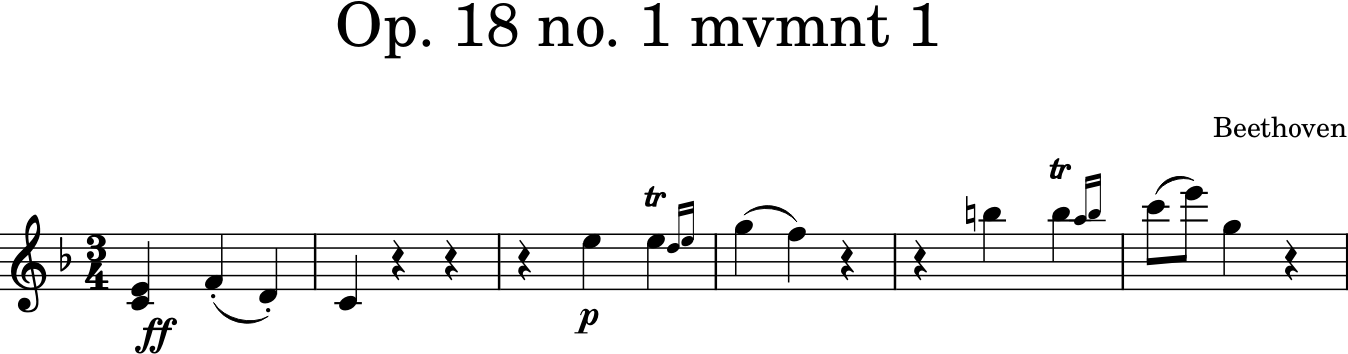

In [119]:
pm.show()

In [6]:
composer='bach'
title='^bwv3+'   # 31x - 2 major, 8 minor; 4xx - 24 major, 27 minor; 3xx - 60 major, 47 minor
filters = {'mode':'minor'}  
scores, titles = MusicUtils.get_scores_from_corpus(composer=composer, title=title, keypart='Soprano', filters=filters)
print(f'number of titles: {len(titles)}\n{titles} ')
scoreinfo = MusicUtils.get_parts_info(scores, display=True)

number of titles: 47
['bwv300.mxl', 'bwv301.mxl', 'bwv305.mxl', 'bwv309.mxl', 'bwv310.mxl', 'bwv311.mxl', 'bwv312.mxl', 'bwv313.mxl', 'bwv314.mxl', 'bwv315.mxl', 'bwv316.mxl', 'bwv319.mxl', 'bwv323.mxl', 'bwv324.mxl', 'bwv328.mxl', 'bwv330.mxl', 'bwv331.mxl', 'bwv333.mxl', 'bwv334.mxl', 'bwv335.mxl', 'bwv337.mxl', 'bwv338.mxl', 'bwv341.mxl', 'bwv342.mxl', 'bwv343.mxl', 'bwv344.mxl', 'bwv345.mxl', 'bwv350.mxl', 'bwv351.mxl', 'bwv352.mxl', 'bwv353.mxl', 'bwv354.mxl', 'bwv356.mxl', 'bwv357.mxl', 'bwv358.mxl', 'bwv36.8-2.mxl', 'bwv363.mxl', 'bwv364.mxl', 'bwv369.mxl', 'bwv372.mxl', 'bwv374.mxl', 'bwv38.6.mxl', 'bwv381.mxl', 'bwv382.mxl', 'bwv383.mxl', 'bwv396.mxl', 'bwv399.mxl'] 
bwv300.mxl
  Soprano  e minor minor
  Alto  e minor minor
  Tenor  e minor minor
  Bass  e minor minor
bwv301.mxl
  Soprano  d minor minor
  Alto  d minor minor
  Tenor  d minor minor
  Bass  d minor minor
bwv305.mxl
  Soprano  a minor minor
  Alto  a minor minor
  Tenor  a minor minor
  Bass  a minor minor
bwv309

In [23]:
ascore = scores[0]
keypart = 'Alto'
spinfo = MusicUtils.get_score_parts_info(ascore, partnames=[keypart], display=False)
spinfo
#ascore.show()

{'Alto': {'key': <music21.key.Key of e minor>,
  'keyName': 'E minor',
  'mode': 'minor'}}

### Scale degree data analysis

In [3]:
from dwbzen.music import NoteCollector
# --order 1 --name bwv31x --format csv --parts "Soprano,Alto,Tenor,Bass" --mode sd
state_size = 1
verbose = 0
source = "composer=bach,title=^bwv4+"
parts = "Soprano,Alto,Tenor,Bass"
collection_mode = 'sd'
enforce_range = True
collector = NoteCollector(state_size=state_size, verbose=verbose, source=source, parts=parts, \
                         collection_mode=collection_mode, enforce_range=enforce_range)

name = 'bwv4xx'
fmt = 'csv'
filter_string = "mode=minor"
key_partName = 'Soprano'
collector.name = name
collector.format = fmt
collector.set_score_filter(filter_string)
collector.key_partName = key_partName
run_results = collector.run()
if run_results['save_result']:
    print(f"MarkovChain written to file: {collector.filename}")
    

title: bwv4.8.mxl
title: bwv40.3.mxl
title: bwv40.6.mxl
title: bwv40.8.mxl
title: bwv403.mxl
title: bwv404.mxl
title: bwv405.mxl
title: bwv406.mxl
title: bwv408.mxl
title: bwv410.mxl
title: bwv412.mxl
title: bwv413.mxl
title: bwv416.mxl
title: bwv417.mxl
title: bwv418.mxl
title: bwv419.mxl
title: bwv42.7.mxl
title: bwv420.mxl
title: bwv421.mxl
title: bwv423.mxl
title: bwv424.mxl
title: bwv425.mxl
title: bwv434.mxl
title: bwv435.mxl
title: bwv437.mxl
title: bwv47.5.mxl
title: bwv48.7.mxl
working on bwv4.8.mxl
working on bwv40.3.mxl
working on bwv40.6.mxl
working on bwv40.8.mxl
working on bwv403.mxl
working on bwv404.mxl
working on bwv405.mxl
working on bwv406.mxl
working on bwv408.mxl
working on bwv410.mxl
working on bwv412.mxl
working on bwv413.mxl
working on bwv416.mxl
working on bwv417.mxl
working on bwv418.mxl
working on bwv419.mxl
working on bwv42.7.mxl
working on bwv420.mxl
working on bwv421.mxl
working on bwv423.mxl
working on bwv424.mxl
working on bwv425.mxl
working on bwv434.mx

In [31]:
bwv4xx_df = pd.read_csv('resources/music/bwv4xx_notesCounts_sd_01.csv')
op18_1_1_df = pd.read_csv('resources/music/op18.1_1_notesCounts_sd_01.csv')

In [32]:
pitchCounts_df, pitches_counts_df = MusicUtils.rearrange(bwv4xx_df)

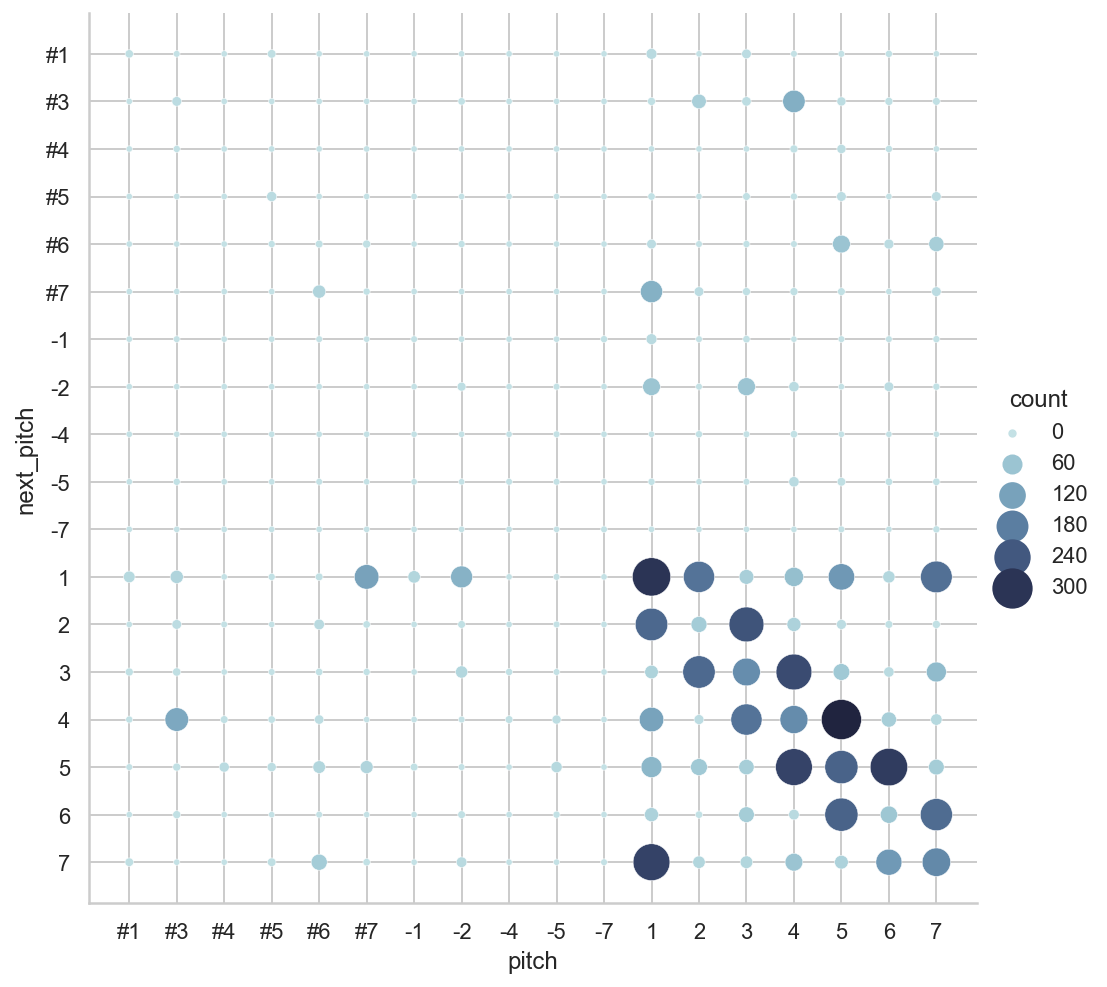

In [33]:
MusicUtils.plot_pitch_counts(bwv4xx_df)

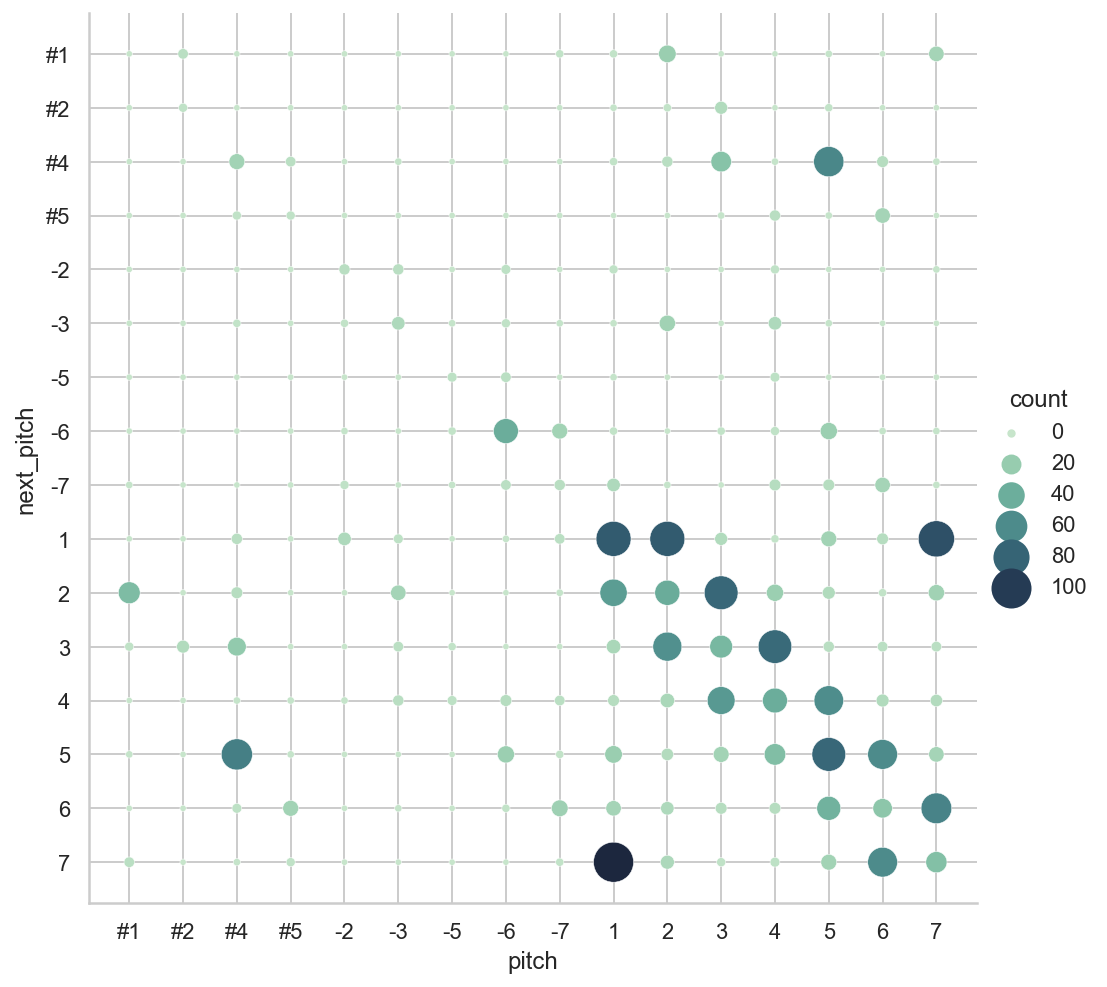

In [34]:
MusicUtils.plot_pitch_counts(op18_1_1_df, rot=-0.4)

In [35]:
bwv4xx_df

,KEY,#1,#3,#4,#5,#6,#7,-1,-2,-4,-5,-7,1,2,3,4,5,6,7
0,#1,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,5.0,2.0,1.0,0.0,7.0
1,#3,1.0,11.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,28.0,11.0,6.0,108.0,5.0,5.0,0.0
2,#4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,13.0,0.0,0.0
3,#5,7.0,0.0,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,3.0,9.0,0.0,7.0
4,#6,0.0,0.0,0.0,0.0,4.0,28.0,1.0,0.0,0.0,1.0,0.0,4.0,15.0,3.0,10.0,25.0,1.0,46.0
5,#7,0.0,0.0,0.0,0.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,118.0,3.0,2.0,0.0,27.0,0.0,3.0
6,-1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,4.0,0.0,0.0
7,-2,0.0,3.0,0.0,0.0,2.0,0.0,0.0,8.0,0.0,0.0,0.0,92.0,4.0,23.0,1.0,1.0,4.0,15.0
8,-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0
9,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,9.0,18.0,2.0,0.0


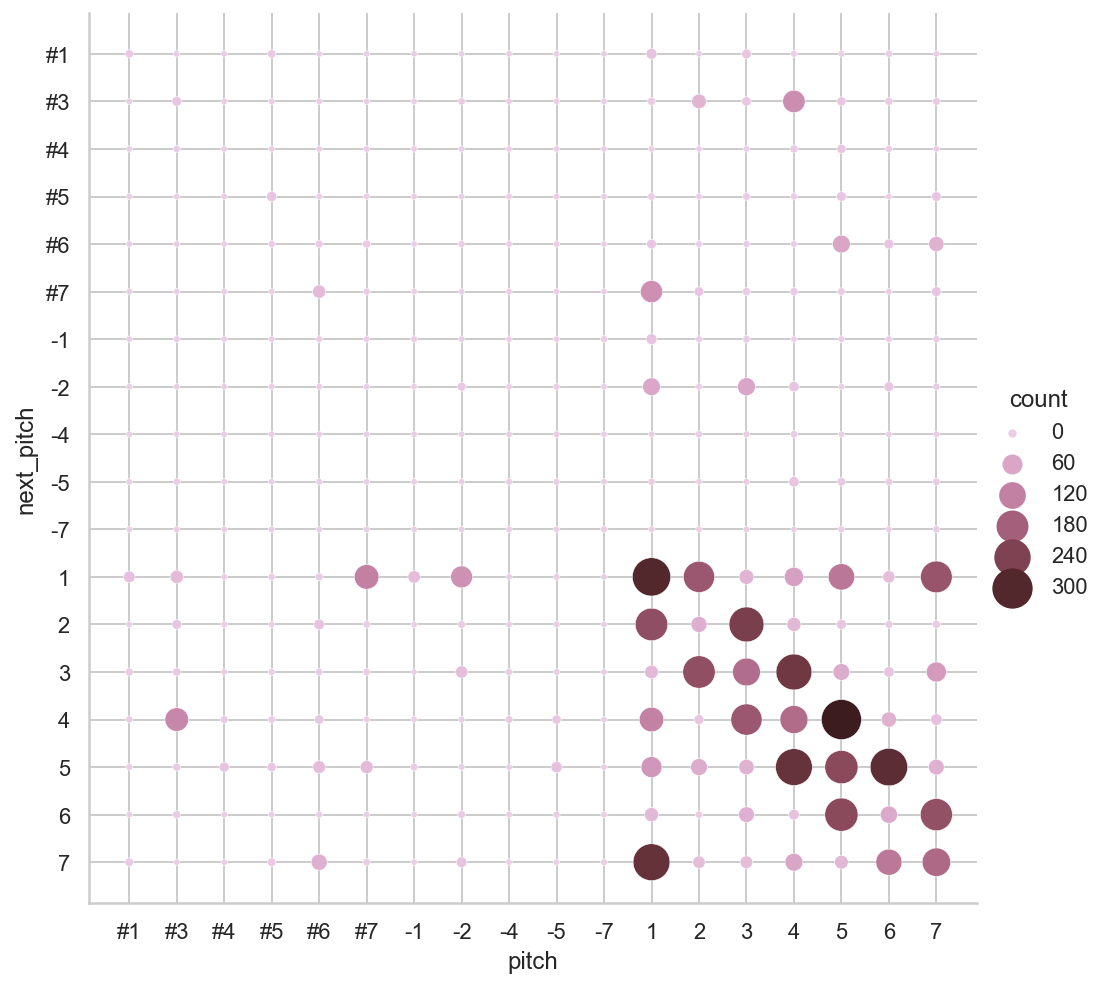

In [36]:
MusicUtils.plot_pitch_counts(bwv4xx_df, start=1, kind='scatter')

In [6]:
bwv4xx_df_major

,KEY,C,B,A,G,D,E,F,B-,F#,C#,G#,E-
0,C,248.0,251.0,36.0,86.0,224.0,43.0,39.0,32.0,6.0,10.0,2.0,0.0
1,B,235.0,38.0,146.0,59.0,15.0,22.0,0.0,3.0,1.0,16.0,1.0,0.0
2,A,12.0,169.0,99.0,229.0,43.0,33.0,19.0,19.0,2.0,1.0,25.0,1.0
3,G,137.0,26.0,185.0,314.0,25.0,70.0,190.0,2.0,69.0,2.0,10.0,2.0
4,D,256.0,21.0,26.0,89.0,121.0,234.0,10.0,3.0,1.0,23.0,3.0,2.0
5,E,55.0,17.0,58.0,35.0,275.0,133.0,191.0,1.0,35.0,3.0,1.0,6.0
6,F,18.0,1.0,12.0,140.0,27.0,240.0,41.0,4.0,6.0,0.0,0.0,4.0
7,B-,9.0,4.0,46.0,4.0,0.0,1.0,0.0,5.0,0.0,0.0,1.0,0.0
8,F#,0.0,4.0,1.0,73.0,16.0,18.0,2.0,0.0,3.0,0.0,7.0,0.0
9,C#,2.0,4.0,3.0,1.0,35.0,3.0,0.0,0.0,0.0,2.0,0.0,3.0


In [13]:
bwv4xx_df['KEY']

0      C
1      E
2      D
3     C#
4      A
5      F
6      G
7     B-
8      B
9     G#
10    F#
11    E-
Name: KEY, dtype: object